In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf  # Statsmodels is a Python module for statistics

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF 
from statsmodels.stats.anova import anova_lm

from ISLP import load_data    # ISLP library for the book, it has built in functions and methods to build models 
from ISLP.models import (ModelSpec as MS, summarize , poly) # It also has built-in data that can be loaded

import matplotlib as mpl


#For inline plotting 
%matplotlib inline                 
%config InlineBackend.figure_format = 'svg'


sns.set(style="white") # Plot parameters defined globally
plt.style.use("seaborn-v0_8-white")

 ## *8) Simple Linear Regression with Auto data set*

In [19]:
data = pd.read_csv('Auto.csv')

In [20]:
print(f'Auto data has {data.shape[0]} rows and {data.shape[1]} columns')

Auto data has 397 rows and 9 columns


In [21]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [22]:
data.info() # horse power data somehow entered as an object 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


In [23]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

- horsepower column has a stringy data type and one missing value with '?', we deal with this as before by first
- replacing '?' with nan which automatically will change the data type of the horsepower column

In [25]:
df = pd.read_csv('Auto.csv', na_values = ['?']) # new dataframe that deals with the missing values '?'

In [26]:
df.horsepower.isna().any()

True

In [27]:
df.horsepower.isna().sum() # total number of missing entries in the horsepower column in 5

5

In [28]:
# drop the rows that has nan due to horsepower column

df = df.dropna()

print(f'We dropped {data.shape[0] - df.shape[0]} rows from the data set')

We dropped 5 rows from the data set


In [29]:
X_train = df['horsepower']
y_train = df['mpg']

Text(0, 0.5, 'mpg')

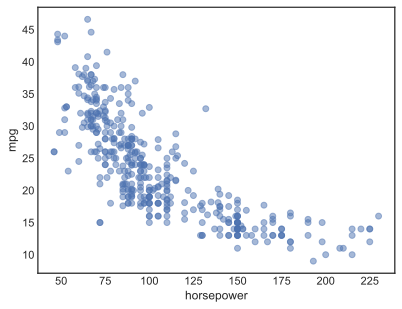

In [30]:
plt.scatter(X_train,y_train, alpha = 0.5)

plt.xlabel('horsepower')
plt.ylabel('mpg')

### *a) - Perform a linear regression using horsepower as a predictor and mpg as the response (targret), summarize the results and comment.*

In [31]:
X_train = sm.add_constant(X_train) # to work with sm.OLS we apparently need to add an intercept via add_constant

model = sm.OLS(y_train, X_train)
fit_results = model.fit()
print(fit_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           7.03e-81
Time:                        14:40:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

### Comments: 

- i. There is a clear relationship between the horsepower and the mpg, p value of the predictor is very low, F-statistic is much larger than 1, its std is small and the confidence interval of horsepower does not contain 0: [-0.171, -0.145]. We can confidently reject the null hypothesis that the regression coefficient $\beta_j$ of horsepower is zero.

- ii. As $R^2 = 0.606$, we can state that about 60 percent of the variance in the response (mpg) can be explained by the horsepower. 

- iii. The relationship between horsepower vs mpg is negative as the regression coefficient $\beta_j = - 0.1578$

- iv. According to the analysis below, the prediction for 98 horsepower is mpg = 24.467 with 95 percent confidence interval = [23.97, 24.96] and prediction interval = [14.81,34.12]

In [33]:
predict_df = pd.DataFrame({'constant': [1.0] ,'horsepower': [98.0]})

In [34]:
predict_df.head()

,constant,horsepower
0,1.0,98.0


In [36]:
predictions = fit_results.get_prediction(predict_df)

print(f' Predicted value of Miles per Gallon for 98 horsepower is: {predictions.predicted_mean[0]:.2f}')

 Predicted value of Miles per Gallon for 98 horsepower is: 24.47


In [39]:
print(f' 95 % Confidence interval is : {predictions.conf_int(alpha=0.05)[0]}')

 95 % Confidence interval is : [23.97307896 24.96107534]


In [40]:
print(f' 95 % Prediction interval is : {predictions.conf_int(obs = True, alpha=0.05)[0]}')

 95 % Prediction interval is : [14.80939607 34.12475823]


### Recall that assuming the true population is captured by a linear model: 

### $$ f(X_1) = \beta_0 + \beta_1 X_1 $$

### we have estimated the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$ to get a prediction $\hat{Y} = \hat{\beta}_0 + \hat{\beta}_1 X_1$. In this way, we average over an ensemble of car data assuming the random irredicuble error $\epsilon_i$ is canceled through the averagin process. Confidence interval is a measure of how accurate our prediction $\hat{Y}$ is close to actual ensemble average response $f(X_1)$. Prediction interval on the other hand, quantifies the error we make for an individual observation including the irreducible error $\epsilon$ in the model $f(X_1) = \beta_0 + \beta_1 X_1 + \epsilon$. Therefore the $95 \%$ interval for the latter is much wider although they are both centered around the mean estimate. 

### *b) - Plot the response and the predictor together with the least square regression line*

In [41]:
# First we define a function that adds a least square line to an axis defined 
def lsline(axis, b, m, *args, **kwargs):
    
    "Add a line with slope m and intercept b to ax"
    xval = np.linspace(df['horsepower'].min(),df['horsepower'].max(),200)
    
    axis = plt.plot(xval, b + m * xval, *args, **kwargs)


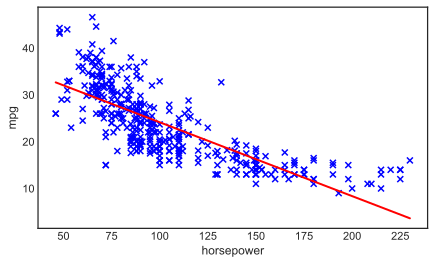

In [42]:
fig, ax = plt.subplots(1,1,figsize = (7,4))

ax.set_xlabel('horsepower')
ax.set_ylabel('mpg')

ax = plt.scatter(df['horsepower'],df['mpg'], marker = 'x', color = 'blue')

lsline(ax, fit_results.params[0], fit_results.params[1], color = 'red', linewidth = 2)

### *c) - Plot some diagnostic plots of least regression fit and comment*

In [43]:
fit_results.fittedvalues # Fitted Values

0      19.416046
1      13.891480
2      16.259151
3      16.259151
4      17.837598
         ...    
392    26.361214
393    31.727935
394    26.676903
395    27.466127
396    26.992593
Length: 392, dtype: float64

In [86]:
fit_results.resid # Residuals 

0      -1.416046
1       1.108520
2       1.740849
3      -0.259151
4      -0.837598
         ...    
392     0.638786
393    12.272065
394     5.323097
395     0.533873
396     4.007407
Length: 392, dtype: float64

In [91]:
# Find top 3 points with largest residuals, get their index to annote later in the plot below 

abs_resid = np.abs(fit_results.resid).sort_values(ascending = False)
t3abs_resid = abs_resid[:3]

(2.631572349830158, 33.67500328690242)

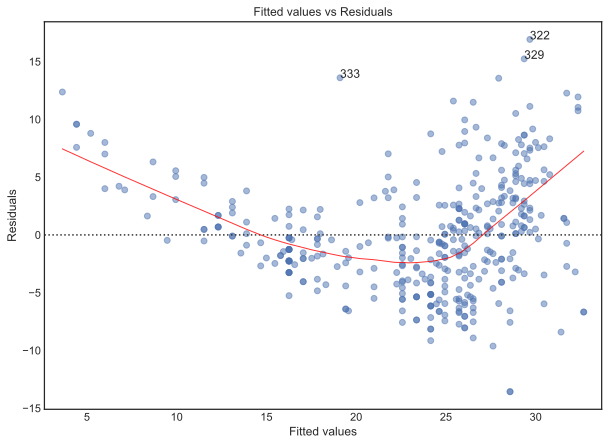

In [92]:
fig, ax = plt.subplots(1,1,figsize = (10,7))

ax = sns.residplot(data = df, x = fit_results.fittedvalues, y= fit_results.resid, lowess=True,
                                  scatter_kws={'alpha': 0.5},
                                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

for i in t3abs_resid.index:
                    ax.annotate(i, 
                               xy=(fit_results.fittedvalues[i], 
                                   fit_results.resid[i]));

ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.set_title('Fitted values vs Residuals')
ax.set_xlim(fit_results.fittedvalues.min()-1,fit_results.fittedvalues.max()+1)

### There is a pattern between fitted values and Residuals, indicating a non-linearity in the data. This is already very clear from the horsepower vs mpg plot. The funnel shape of the plotted residuals indicates that we are in the presence of heteroscedasticity.

In [93]:

# standartized residuals 
norm_resid = fit_results.get_influence().resid_studentized_internal

# leverage, from statsmodels internals
leverage = fit_results.get_influence().hat_matrix_diag


In [95]:
# Cook's distance can be used to identify influential observations in a regression model. 
# Essentially Cook’s distance measures how much all of the fitted values in the model change when the ith observation is deleted.

# The larger the value for Cook’s distance, the more influential a given observation.

cooks = fit_results.get_influence().cooks_distance # returns the cooks distance for each oberservation i and the corresponding p-values 

#cooks[0] returns the cooks distances

### Cook's distance formula 

### $$ D_ i  = \frac{t_i^2}{p} \frac{h_i}{1-h_i},$$

### where $p$ is the number of parameters in the model (including the intercept), $h_i$ is the leverage and $t_i^2$ is the square of the studentized residuals. Since we will plot leverage vs studentized residuals we write 

### $$ t_i^2  = p \times D_i\,\, \frac{(1-h_i)}{h_i}$$

In [110]:
# top two influential observations according to Cooks distance, argsort() returns the cooks distance in ascending order so we flip to
# get the top 2

top_cooks = np.flip(np.argsort(cooks[0]),0)[:2] 

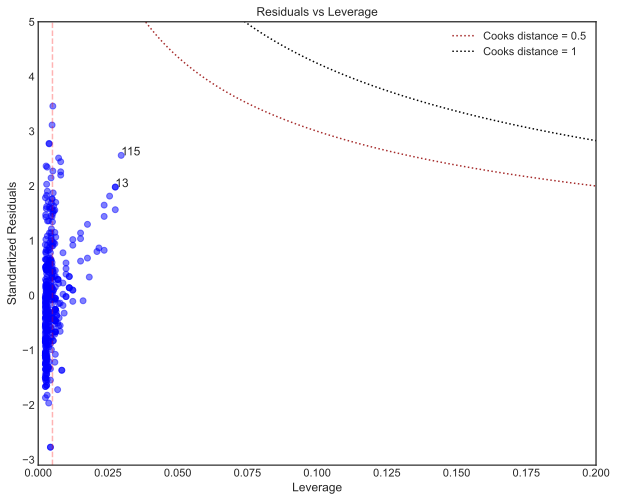

In [113]:
fig, axes = plt.subplots(1,1,figsize = (10,8))

axes.set_xlim(0, 0.2)
axes.set_ylim(-3.1, 5)
axes.set_title('Residuals vs Leverage')
axes.set_xlabel('Leverage')
axes.set_ylabel('Standartized Residuals')

for obs in top_cooks:
    axes.annotate(obs, xy = (leverage[obs],norm_resid[obs]))

p = len(fit_results.params) - 1 # number of predictors 
n = len(df) # number of observations 
axes.axvline((p+1)/n, linestyle = 'dashed', color = 'red', alpha = 0.3) # average leverage of all the observations 

# Cooks distance = 0.5 plot in the leverage vs residuals plane 
x = np.linspace(0.01,0.2,100)

def cooks_dy(l,d):
    return np.sqrt((p+1) * d * (1-l)/l)

axes.plot(x, cooks_dy(x, d = 0.5), label = 'Cooks distance = 0.5', ls = ':' , color = 'brown')
axes.plot(x, cooks_dy(x, d = 1), label = 'Cooks distance = 1', ls = ':' , color = 'black')
axes.legend(loc = 'best')

axes.scatter(leverage,norm_resid, alpha = 0.5, color = 'blue')

### Abs value of the Standartized residuals lie mostly below 3, but there are a couple of points in the upper part of the plot and they are potential outliers. However these points are far away from the significant level of cooks distance making them unlikely to influence the regression fit. There are quite some candidates for high leverage points as well, which lie on the right hand side of the vertical red dashed line (average leverge of the observations) but these observations cannot influence the fit too much as the highest top two of such observations are quite away from any significant cooks distance.

## **References**

### It turns out that in R, plotting diagnostic plots to test the performence of linear regression procedure is much easier. I followed the link below to generate plots similar to the main text for diagnosis of heteroskasdicity, outliers, leverage points and nonlinearity. 

- https://emredjan.medium.com/emulating-r-regression-plots-in-python-43741952c034

### Cooks distance: 

- https://en.wikipedia.org/wiki/Cook%27s_distance

### Introduction to Statistical Learning with Python: 

- [Introduction to Statistical Learning with Python](https://www.statlearning.com/). 